In [88]:
# load libraries and scripts
include("../scripts/tools.jl")
include("../scripts/plotting.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl");
include("../scripts/ps_analysis.jl");

In [2]:
#load borders
border, scale_factor = import_border("../data/borders/border.json")

dx = 0.005
Nx, Ny, coord, isinside, isborder, isgrid, n = get_grid(border, dx);

In [3]:
# compute or load grid parameters
minv, gamma, p, xi, bx, by, m, d = get_params(isinside, isgrid, n, Ny, Nx, Float64(dx), coord,
    scale_factor, "../data/disc/pantagruel.h5",
    "../numerics/grid_params_" * string(dx) * ".h5",
    Niter=10, dmax = 2*dx, patch=4000.0, bmin=0.0, tau=0.00001);

  3.789407 seconds (3.69 M allocations: 16.980 GiB, 7.97% gc time, 10.86% compilation time)
  1.620794 seconds (272.02 k allocations: 1.028 GiB, 22.16% gc time, 13.44% compilation time)


In [4]:
th0 = compute_stable_sol(isinside, n, bx, by, p, interval = 10000, Niter = 60000, tol = 1e-7);

[10000.0 9.135614717381557e-5]
[20000.0 1.9467472297529653e-5]
[30000.0 1.203183307429967e-5]
[40000.0 7.510898451190684e-6]
[50000.0 4.915596673371603e-6]
[60000.0 3.292179147518226e-6]
  6.867568 seconds (1.90 M allocations: 19.681 GiB, 6.97% gc time, 7.14% compilation time)


In [53]:
gen, dem, bline, idb, idgen, coord_disc, mg, dg, dl, th_ref = load_discrete_model("../data/disc/pantagruel.h5", scale_factor)

([16.61, 0.0, 0.0, 0.0, 1.2990000000000002, 12.5, 3.3360000000000003, 0.0, 15.95, 11.5  …  12.74, 10.0, 21.953000488408005, 2.54, 0.75, 1.59, 11.57035752804289, 3.24, 9.9, 8.14], [2.149, 2.501, 1.361, 7.2379999999999995, 5.609, 7.316, 0.94, 1.148, 7.246, 0.764  …  0.597, 0.6509999999999999, 0.626, 0.635, 0.905, 0.9159999999999999, 0.877, 0.87, 0.392, 0.866], [55.13591001819485, 55.13591001819485, 72.43227582210633, 72.43227582210633, 77.16644802839726, 77.16644802839726, 128.71669455528382, 128.71669455528382, 193.23671497584542, 193.23671497584542  …  145.85764294049008, 145.85764294049008, 118.76484560570071, 63.09944472488642, 63.09944472488642, 189.60940462646948, 189.60940462646948, 402.4144869215292, 117.84115012962526, 166.6944490748458], [1 2; 1 2; … ; 3804 3809; 3806 3809], [1, 3, 4, 7, 11, 16, 17, 18, 21, 23  …  3727, 3728, 3735, 3747, 3748, 3750, 3752, 3777, 3786, 3809], [-0.34898767252977725 0.23993440216157752; -0.32121454536345445 0.22494494992048752; … ; -0.2433835105323

In [23]:
# add a disturbance
#dp = local_disturbance(coord[isgrid,:], [-0.2; -0.5], -10.0, 0.1, dx)
dp = local_disturbance(coord[isgrid,:], [-0.35; 0.24], -10.0, 0.02, dx)

14597-element Vector{Float64}:
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
  ⋮
 -1.3610332468503955e-57
 -3.100431014187884e-59
 -6.634863704670563e-61
 -1.3338240199914507e-62
 -8.696806153568617e-57
 -2.108902655071832e-58
 -4.8040760303387196e-60
 -1.0280631803227293e-61
 -2.066742325118108e-63
 -3.069735297028882e-59
 -6.992850867001659e-61
 -1.496456853815738e-62

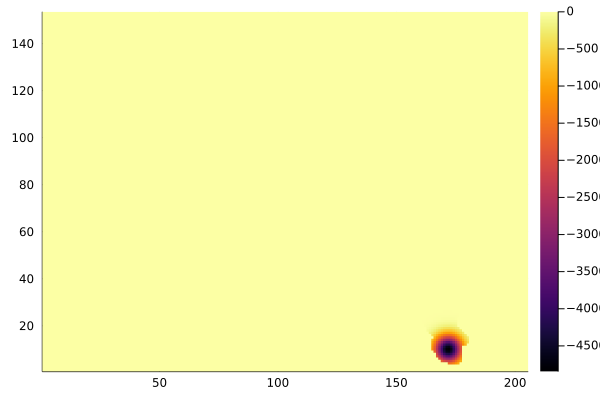

In [24]:
#temp = zeros(size(isgrid))
#temp[isgrid] = dp
#heatmap(reshape(temp,Ny,Nx))

In [25]:
ts, ~, omegas = perform_dyn_sim(isgrid, xi, p+dp, minv, gamma, th0, interval=10,
    Ndt=5000, dt=0.01, method="crank-nicolson");

Total time: 50.0
NIter: 10 Avg. Omega: -0.015713793093850043
NIter: 20 Avg. Omega: -0.02536782095541863
NIter: 30 Avg. Omega: -0.03423271332446403
NIter: 40 Avg. Omega: -0.04467367389834126
NIter: 50 Avg. Omega: -0.05538036969953117
NIter: 60 Avg. Omega: -0.06490342198357679
NIter: 70 Avg. Omega: -0.0746667862275955
NIter: 80 Avg. Omega: -0.08354879856598357
NIter: 90 Avg. Omega: -0.0919405600903361
NIter: 100 Avg. Omega: -0.1003792358117996
NIter: 110 Avg. Omega: -0.10970777096614692
NIter: 120 Avg. Omega: -0.11709808436344035
NIter: 130 Avg. Omega: -0.12210168130983881
NIter: 140 Avg. Omega: -0.12835748142238457
NIter: 150 Avg. Omega: -0.13723449949283664
NIter: 160 Avg. Omega: -0.1450534376528612
NIter: 170 Avg. Omega: -0.14981615163533973
NIter: 180 Avg. Omega: -0.15376124155049806
NIter: 190 Avg. Omega: -0.15579604054414053
NIter: 200 Avg. Omega: -0.154038546524862
NIter: 210 Avg. Omega: -0.14852704018044824
NIter: 220 Avg. Omega: -0.1436572148158749
NIter: 230 Avg. Omega: -0.1372

NIter: 1870 Avg. Omega: -0.16452387752295147
NIter: 1880 Avg. Omega: -0.16482482946560859
NIter: 1890 Avg. Omega: -0.16516613349603868
NIter: 1900 Avg. Omega: -0.1657437513712234
NIter: 1910 Avg. Omega: -0.16656846318979862
NIter: 1920 Avg. Omega: -0.1674394181950687
NIter: 1930 Avg. Omega: -0.1681942108981284
NIter: 1940 Avg. Omega: -0.16886385442580978
NIter: 1950 Avg. Omega: -0.16947652670809532
NIter: 1960 Avg. Omega: -0.17001590643689865
NIter: 1970 Avg. Omega: -0.17041074328461672
NIter: 1980 Avg. Omega: -0.17087589904252234
NIter: 1990 Avg. Omega: -0.17144890789034542
NIter: 2000 Avg. Omega: -0.1720133812530541
NIter: 2010 Avg. Omega: -0.17247108725367616
NIter: 2020 Avg. Omega: -0.1727396299314563
NIter: 2030 Avg. Omega: -0.17266900421816814
NIter: 2040 Avg. Omega: -0.1723873500661997
NIter: 2050 Avg. Omega: -0.1720973552289138
NIter: 2060 Avg. Omega: -0.17181491730741383
NIter: 2070 Avg. Omega: -0.17144604148769493
NIter: 2080 Avg. Omega: -0.17104639388162224
NIter: 2090 Avg. 

NIter: 3710 Avg. Omega: -0.16815813701256557
NIter: 3720 Avg. Omega: -0.16816491802459435
NIter: 3730 Avg. Omega: -0.1681871243716078
NIter: 3740 Avg. Omega: -0.1682101202991463
NIter: 3750 Avg. Omega: -0.16822041438999683
NIter: 3760 Avg. Omega: -0.16822899766745347
NIter: 3770 Avg. Omega: -0.16823472300700246
NIter: 3780 Avg. Omega: -0.16824397586775258
NIter: 3790 Avg. Omega: -0.1682495077104655
NIter: 3800 Avg. Omega: -0.16826162914337184
NIter: 3810 Avg. Omega: -0.16828088693786913
NIter: 3820 Avg. Omega: -0.16829634684923878
NIter: 3830 Avg. Omega: -0.16831235757912244
NIter: 3840 Avg. Omega: -0.16832817482322177
NIter: 3850 Avg. Omega: -0.16833555667666578
NIter: 3860 Avg. Omega: -0.16833309939828503
NIter: 3870 Avg. Omega: -0.16832890508973322
NIter: 3880 Avg. Omega: -0.1683249775886109
NIter: 3890 Avg. Omega: -0.16831995490552526
NIter: 3900 Avg. Omega: -0.168322264181059
NIter: 3910 Avg. Omega: -0.16832812070931258
NIter: 3920 Avg. Omega: -0.16833714448748005
NIter: 3930 Avg.

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9  …  49.1, 49.2, 49.300000000000004, 49.4, 49.5, 49.6, 49.7, 49.800000000000004, 49.9, 50.0], [-0.8003774090843853 -0.8005237618178813 … -8.633183413754525 -8.650020631958007; -0.7836056618613743 -0.7837444384396288 … -8.616410388378528 -8.633247682142047; … ; -0.17682889815310732 -0.176371219845114 … -8.400552127162989 -8.417376433637765; -0.17687037345706522 -0.17641465354513955 … -8.40029554123965 -8.417119828498015], [0.0 -0.0030932819899688675 … -0.1683822548303592 -0.16837487925452266; 0.0 -0.003121525075445092 … -0.16838285095819305 -0.16836643426982498; … ; 0.0 0.007622467761489842 … -0.16827218943050232 -0.1682524549426846; 0.0 0.008118640145501066 … -0.16827163131908382 -0.16825430382577497])

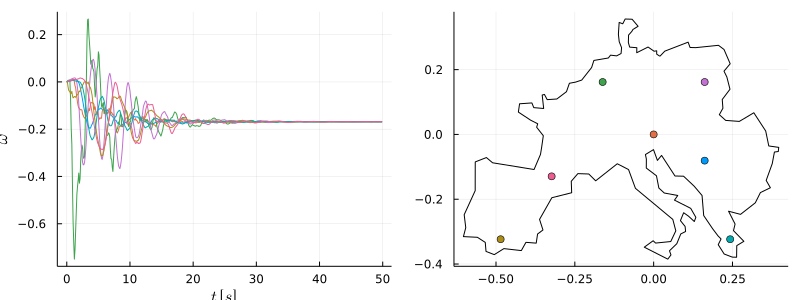

In [52]:
c = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400] / scale_factor
time_plot(ts, omegas, coord[isgrid,:], c, borders = [border], tstart = 0.0, tend = 50.0)

In [48]:
data = h5read("../numerics/disc_results.h5","/");
o = data["omegas"];
t = data["ts"];
println(size(t))
println(size(o))
reshape(t,prod(size(o)),1)
t[1:size(o,2)]

(557, 1001)
(557, 1001)


1001-element Vector{Float64}:
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35000000000000003
  0.4
  0.45
  0.5
  0.55
  0.6
  0.65
  ⋮
 49.5
 49.550000000000004
 49.6
 49.65
 49.7
 49.75
 49.800000000000004
 49.85
 49.9
 49.95
 50.0
  0.0

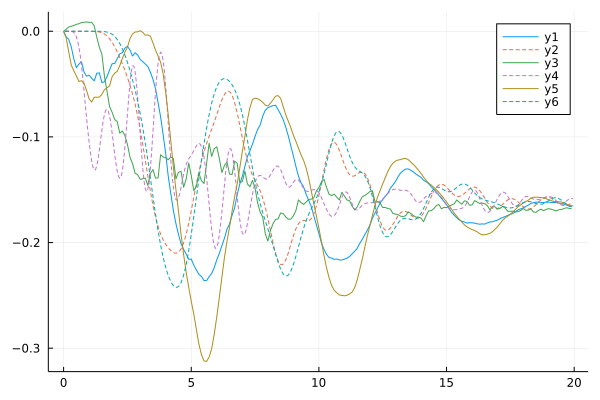

In [90]:
#c = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400] / scale_factor
c = [-.30 -.25; 0.0 0.0; -.5 -.30; .25 .15]

cmp_plot( coord[isgrid,:], omegas, ts, coord_disc[idgen[gen .> 0.0],:], o[:,1:end-1], t[1:size(o,2)-1],
    c, tstart=0.0, tend=20.0)
current()